In [396]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', font_scale = 1.5)
# load data
correlations = pd.read_csv('./output/vars_sorted.csv')

In [397]:
#correlations = correlations[correlations.Diff_corr_and_corr_imp != '#DIV/0!']
#correlations.Diff_corr_and_corr_imp = correlations.Diff_corr_and_corr_imp.astype('float')
# correlations

In [398]:
correlations.dtypes

VariableName           object
description            object
pearson_corr          float64
pearson_p_val         float64
spearman_corr         float64
spearman_p_val        float64
%mis                  float64
pearson_corr_imp      float64
pearson_p_val_imp     float64
spearman_corr_imp     float64
spearman_p_val_imp    float64
dtype: object

In [399]:
#ax = sns.scatterplot(data=correlations, x = "%mis", y= "Diff_corr_and_corr_imp")
#ax

In [400]:
#ax.set_ylim(0, 1)
#ax.figure

In [401]:
correlations['Diff_pcorr_and_pcorr_imp_dir'] = (correlations['pearson_corr_imp'] - correlations['pearson_corr']) / (correlations['pearson_corr'])

In [402]:
# correlations

<AxesSubplot:xlabel='%mis', ylabel='Diff_pcorr_and_pcorr_imp_dir'>

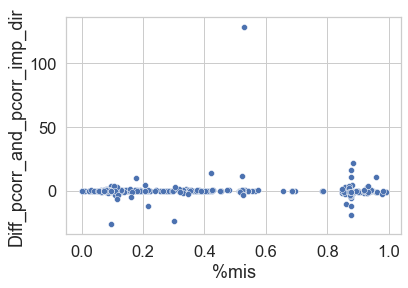

In [403]:
ax = sns.scatterplot(data=correlations, x = "%mis", y= "Diff_pcorr_and_pcorr_imp_dir")
ax

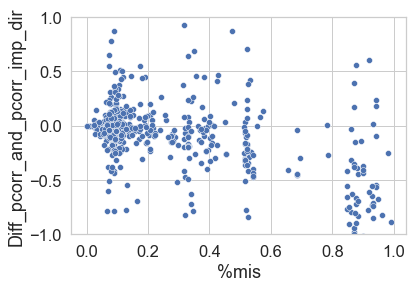

In [404]:
ax.set_ylim(-1, 1)
ax.figure

In [405]:
plt.tight_layout()
ax.figure.tight_layout()

ax.figure.savefig('./output/directional_correlations.svg', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

In [406]:
# correlations[correlations.Diff_pcorr_and_pcorr_imp_dir > 0]

In [407]:
if 'Unnamed: 0' in correlations.columns:
    correlations = correlations.rename(columns={'Unnamed: 0':'VariableName'})
correlations.to_csv('./output/vars_sorted_dir.csv')

In [408]:
correlations['pearson_corr_rank'] = correlations['pearson_corr'].abs().rank(ascending=False)
# correlations

In [409]:
correlations['spearman_corr_rank'] = correlations['spearman_corr'].abs().rank(ascending=False)
# correlations


In [410]:
correlations['pearson_corr_imp_rank'] = correlations['pearson_corr_imp'].abs().rank(ascending=False)
correlations['spearman_corr_imp_rank'] = correlations['spearman_corr_imp'].abs().rank(ascending=False)

In [411]:
correlations = correlations.sort_values(by=['pearson_p_val']) # double check this did not change?
# correlations

In [412]:
cols_ordered = ['VariableName', 'description', 'pearson_corr', 'pearson_corr_rank',
            'pearson_p_val', 'spearman_corr', 'spearman_corr_rank',
            'spearman_p_val', '%mis', 'pearson_corr_imp', 'pearson_corr_imp_rank', 'pearson_p_val_imp',
            'spearman_corr_imp', 'spearman_corr_imp_rank', 'spearman_p_val_imp']
correlations = correlations[cols_ordered]

In [413]:
correlations.to_csv('./output/vars_sorted_dir_ranked.csv')

In [414]:
cols_rounded = ['pearson_corr', 'spearman_corr', 'pearson_corr_imp','spearman_corr_imp']
round_dict = {}
for col in cols_rounded:
    round_dict[col] = 2
correlations_rounded = correlations.round(round_dict)
# correlations

In [415]:
correlations_rounded.to_csv('./output/vars_sorted_dir_ranked_rounded.csv')

In [416]:
#preprocessed_with_temporal = pd.read_csv('./output/preprocessed_data_with_temporal.txt')


In [417]:
#len(preprocessed_with_temporal['timestamp'].unique())

In [418]:
#preprocessed_with_temporal['timestamp'].unique()

In [419]:
# Plot distribution of samples < 60% MVI vs samples > 60% MVI
# with their ratio of change in pearson correlation
# cor_small = correlations[correlations['%mis'] < 0.60]
# cor_small
# cor_large = correlations[correlations['%mis'] >= 0.60]
# cor_large
correlations['60_MVI'] = correlations.apply(lambda x: x['%mis'] >= 0.6, axis=1)
correlations['Diff_pcorr_and_pcorr_imp_dir'] = (correlations['pearson_corr_imp'] - correlations['pearson_corr']) / (correlations['pearson_corr'])
cor_small = correlations[correlations['%mis'] < 0.60]
cor_large = correlations[correlations['%mis'] >= 0.60]
# correlations

<AxesSubplot:xlabel='%mis', ylabel='Diff_pcorr_and_pcorr_imp_dir'>

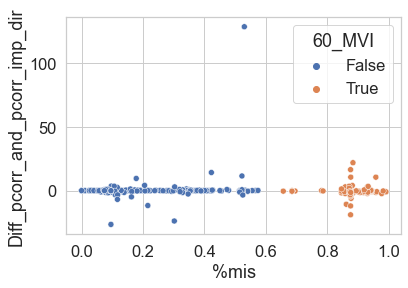

In [420]:
ax = sns.scatterplot(data=correlations, x = "%mis", y= "Diff_pcorr_and_pcorr_imp_dir", hue='60_MVI')
ax

In [421]:
plt.tight_layout()
ax.figure.tight_layout()
ax.figure.savefig('./output/directional_correlations_MVI.svg', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

In [424]:
# t-test to see how different the distributions are
# MVI < 60% vs MVI >= 60%
# from scipy.stats import ttest_ind
# t, p = ttest_ind(cor_small['Diff_pcorr_and_pcorr_imp_dir'], cor_large['Diff_pcorr_and_pcorr_imp_dir'])
from scipy.stats import f_oneway
# cor_small.replace([np.inf, -np.inf], np.nan, inplace=True)
# cor_large.replace([np.inf, -np.inf], np.nan, inplace=True)
small = cor_small['Diff_pcorr_and_pcorr_imp_dir'].dropna()
large = cor_large['Diff_pcorr_and_pcorr_imp_dir'].dropna()
f, p = f_oneway(small, large)
print("F one way", f, p)

F one way 1.2989669797080052 0.25471749939555843
